In [30]:
import sys
import os
import pickle

# Append the project dir to path
sys.path.append(os.path.join("..", ".."))
from data_pipeline.utils import create_metadata_df
from data_pipeline.dataset_xy import CARLADatasetXY
from data_pipeline.data_preprocessing import preprocessing
from torch.utils.data import DataLoader
import cv2
from torchvision import transforms
import torch
import PIL

In [4]:
path_data = os.path.join("..", "..", "data", "data")

config_xy = {"used_inputs": ["rgb", "measurements"], 
        "used_measurements": ["speed", "steer", "throttle", "brake", "command"],
        "y": ["brake", "steer", "throttle"],
        "seq_len": 1
        }

df_meta_data = create_metadata_df(path_data, config_xy["used_inputs"])

Varying number files among input types: ../../data/data/rl_dataset_23_11/Routes_clipped_Town05_rl_Seed0/clipped_Town05_rl_route30_11_23_17_42_15/lidar_trans


In [51]:
# Test same size resize: Looks completely the same as original --> reshaping between shapes doesn't mess up things!
for idx in range(len(df_meta_data)):
    path_load = os.path.join(df_meta_data["dir"][idx], "rgb", df_meta_data["rgb"][idx])
    print(path_load)
    img_np = cv2.imread(path_load).reshape((3, 160, 960))
    img_torch = torch.Tensor(img_np)
    img_torch_resized = transforms.Compose([
                        transforms.Resize([160, 960])
                        ])(img_torch) # ,
    img_np_resized = img_torch_resized.numpy().reshape((160, 960, 3))
    cv2.imwrite("test.png", img_np_resized)
    break

../../data/data/cycl_dataset_23_11/Routes_non-straight-junction-Scen4_Town07_junction_Seed2000/non-straight-junction-Scen4_Town07_junction_route28_11_23_22_00_23/rgb/0000.png


In [54]:
# Test reducing W while keeping H: Generally gray with green vertical stripes; But the overall scene is still recognizable
for idx in range(len(df_meta_data)):
    path_load = os.path.join(df_meta_data["dir"][idx], "rgb", df_meta_data["rgb"][idx])
    print(path_load)
    img_np = cv2.imread(path_load).reshape((3, 160, 960))
    img_torch = torch.Tensor(img_np)
    img_torch_resized = transforms.Compose([
                        transforms.Resize([160, 224])
                        ])(img_torch) # ,
    img_np_resized = img_torch_resized.numpy().reshape((160, 224, 3))
    cv2.imwrite("test.png", img_np_resized)
    break

../../data/data/cycl_dataset_23_11/Routes_non-straight-junction-Scen4_Town07_junction_Seed2000/non-straight-junction-Scen4_Town07_junction_route28_11_23_22_00_23/rgb/0000.png


In [55]:
# Test reducing W & increase H only slightly: Gray with horizontal stripes; Repetitive pattern; Scene NOT recognizable
for idx in range(len(df_meta_data)):
    path_load = os.path.join(df_meta_data["dir"][idx], "rgb", df_meta_data["rgb"][idx])
    print(path_load)
    img_np = cv2.imread(path_load).reshape((3, 160, 960))
    img_torch = torch.Tensor(img_np)
    img_torch_resized = transforms.Compose([
                        transforms.Resize([170, 224])
                        ])(img_torch) # ,
    img_np_resized = img_torch_resized.numpy().reshape((170, 224, 3))
    cv2.imwrite("test.png", img_np_resized)
    break

../../data/data/cycl_dataset_23_11/Routes_non-straight-junction-Scen4_Town07_junction_Seed2000/non-straight-junction-Scen4_Town07_junction_route28_11_23_22_00_23/rgb/0000.png


In [53]:
# Test 
for idx in range(len(df_meta_data)):
    path_load = os.path.join(df_meta_data["dir"][idx], "rgb", df_meta_data["rgb"][idx])
    print(path_load)
    img_np = cv2.imread(path_load).reshape((3, 160, 960))
    img_torch = torch.Tensor(img_np)
    img_torch_resized = transforms.Compose([
                        transforms.Resize([224, 224])
                        ])(img_torch) # ,
    img_np_resized = img_torch_resized.numpy().reshape((224, 224, 3))
    cv2.imwrite("test.png", img_np_resized)
    break

../../data/data/cycl_dataset_23_11/Routes_non-straight-junction-Scen4_Town07_junction_Seed2000/non-straight-junction-Scen4_Town07_junction_route28_11_23_22_00_23/rgb/0000.png


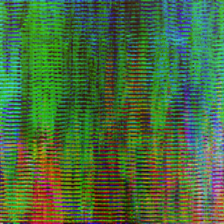

In [39]:
img_torch_resized

In [42]:
for idx in range(len(df_meta_data)):
    path_load = os.path.join(df_meta_data["dir"][idx], "rgb", df_meta_data["rgb"][idx])
    print(path_load)
    img_np = cv2.imread(path_load).reshape((3, 160, 960))
    img_torch = torch.Tensor(img_np)
    img_torch_resized = transforms.Compose([
                        transforms.Resize([170, 224])
                        ])(img_torch) # ,
    img_np_resized = img_torch_resized.numpy().reshape((170, 224, 3))
    cv2.imwrite("test.png", img_np_resized)
    break

../../data/data/cycl_dataset_23_11/Routes_non-straight-junction-Scen4_Town07_junction_Seed2000/non-straight-junction-Scen4_Town07_junction_route28_11_23_22_00_23/rgb/0000.png


In [48]:
for idx in range(len(df_meta_data)):
    path_load = os.path.join(df_meta_data["dir"][idx], "rgb", df_meta_data["rgb"][idx])
    print(path_load)
    img_np = cv2.imread(path_load).reshape((3, 160, 960))
    img_torch = torch.Tensor(img_np)
    img_torch_resized = transforms.Compose([
                        transforms.ToPILImage(),
                        transforms.Resize([160, 224]),
                        transforms.PILToTensor()
                        ])(img_torch) # 
    img_np_resized = img_torch_resized.numpy().reshape((160, 224, 3))
    cv2.imwrite("test.png", img_np_resized)
    break

../../data/data/cycl_dataset_23_11/Routes_non-straight-junction-Scen4_Town07_junction_Seed2000/non-straight-junction-Scen4_Town07_junction_route28_11_23_22_00_23/rgb/0000.png


In [50]:
img_np_resized.shape

(160, 224, 3)

In [32]:
im = PIL.Image.open(path_load)
 
im.show()

In [34]:
im.resize([224, 224]).show()


In [13]:
img_torch

tensor([[[196., 190., 186.],
         [196., 190., 186.],
         [197., 190., 187.],
         ...,
         [198., 192., 189.],
         [197., 192., 189.],
         [197., 192., 188.]],

        [[196., 190., 186.],
         [197., 191., 187.],
         [197., 191., 187.],
         ...,
         [197., 192., 189.],
         [197., 192., 189.],
         [197., 192., 189.]],

        [[196., 190., 186.],
         [196., 191., 186.],
         [197., 192., 187.],
         ...,
         [198., 193., 189.],
         [198., 193., 189.],
         [199., 192., 189.]],

        ...,

        [[200., 236., 252.],
         [202., 236., 252.],
         [200., 236., 252.],
         ...,
         [112., 175., 150.],
         [124., 194., 168.],
         [180., 226., 199.]],

        [[205., 237., 252.],
         [203., 236., 252.],
         [200., 236., 252.],
         ...,
         [ 88., 170., 148.],
         [126., 192., 167.],
         [180., 227., 200.]],

        [[199., 236., 252.],
       

In [64]:
cv2.imshow("bla", cv2.imread(path_load))

: 

## Test possible huge bug

In [38]:
dataset = CARLADatasetXY(root_dir=path_data, df_meta_data=df_meta_data, config=config_xy)
dataloader = DataLoader(dataset, batch_size=64, num_workers=0, shuffle=False, )

In [53]:
for x, y,idx in dataloader:
    rgb_prep = preprocessing["rgb"](torch.squeeze(x["rgb"]))
    break

In [54]:
rgb_prep.shape

torch.Size([64, 3, 224, 224])

In [55]:
sq = torch.squeeze(x["rgb"])
torch.squeeze(sq).shape

torch.Size([64, 3, 160, 960])

In [56]:
sq.shape

torch.Size([64, 3, 160, 960])